In [76]:
# Importing the required packages
import igraph as ig
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats

# Specifying the figure parameters
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
params = {'legend.fontsize': 12,
          'legend.handlelength': 2.}
plt.rcParams.update(params)

In [5]:
#SIR simulation

def results(iters= 3,pop=10000,edge_per_node= 2,days=170,m=8, power = 1,
            probs_inf=[0.01,0.01,0.1,0.2,0.3,0.3,0.3,0.25,0.2,0.15,0.1,0.05,0.01,0.01]):
    """stores the results of the SIR model for stats/plotting"""
    time_1perc_all = [] #time when 1% of the population is first infected
    tot_time_1perc_all = [] #total time for which 1% of the population is infected
    time_1hub_all = [] #time when the first hub is infected
    cl_coeffs_all = [] #clustering coefficient of network at each iteration
    S_final = []
    R_final = []
    I_final = []
    no_rm_all = []
    peak_time_all = []
    peak_perc_all = []
    for i in range(0,iters):
        time_1perc = False
        time_1hub = False
        tt = False
        tt_peak = False
        tot_time_1perc = 0.0
        I_stores = 0.0
        
        g = ig.Graph.Barabasi(pop, edge_per_node,power)
        g.vs["state"] = "S"
        g.vs["duration"] = 0
        i = rd.randint(0, pop-1)
        g.vs[i]["state"] = "I"
        
        for time in range(days): #no. of days
            if len(g.vs.select(state_eq = "I")) > pop*0.01 and time_1perc is False:
                #stores the time that 1% of the population is infected
                time_1perc = True
                tot_time_1perc = float(time)
                time_1perc_all.append(time)
            if len(g.vs.select(state_eq = "I")) < pop*0.01 and tot_time_1perc > 0.0 and tt is False:
                #stores the total time for which 1% of the population is infected
                tot_time = time - tot_time_1perc
                tot_time_1perc_all.append(tot_time)
                tt = True
                # stores the clustering coefficient associated with that time
                cl_coeff = g.transitivity_undirected()
                cl_coeffs_all.append(cl_coeff)
            for n in g.vs.select(state_eq = "I"): #iterates through each node in the network
                if g.vs[n.index]["duration"] == 0 and len(g.neighbors(n)) > m and time_1hub == False:
                    #stores the time that the first hub is infected
                    time_1hub = True
                    time_1hub_all.append(time)
                g.vs[n.index]["duration"] += 1 #from day 0 to infect_len this node continues to infect
                day_inf = g.vs[n.index]["duration"]
                for nb in g.neighbors(n): #iterates through neighbours of that node
                    if g.vs[nb]["state"] == "S": #if node is infected...
                        r = rd.random() #random state
                        if r < probs_inf[day_inf]:
                            g.vs[nb]["state"] = "I" #change state to infected
                if g.vs[n.index]["duration"] >= rd.randrange(2,14): #after infect_len that node changes to recovered
                    g.vs[n.index]["state"] = "R"
            if time == days-1:
                S_final.append(len(g.vs.select(state_eq = "S")))
                I_final.append(len(g.vs.select(state_eq = "I")))
                R_final.append(len(g.vs.select(state_eq = "R")))
            if time_1perc is True and I_stores > len(g.vs.select(state_eq = "I")) and tt_peak is False:
                # if pop greater than 1% and previous no. of infected nodes is higher than current assume peak
                tt_peak = True
                peak_time_all.append(time)
                peak_perc_all.append(I_stores)
            I_stores = len(g.vs.select(state_eq = "I"))
            

    return peak_time_all, peak_perc_all, cl_coeffs_all, tot_time_1perc_all, time_1perc_all, S_final, I_final,R_final



   

   

In [6]:
Control = results(iters = 300)
Power_2 = results(iters = 300, power = 2)
Power_3 = results(iters = 300, power = 3)
Power_4 = results(iters = 300, power = 4)
Power_5 = results(iters = 300, power = 5)
Degree_3 = results(iters = 300, edge_per_node= 3)
Degree_4 = results(iters = 300, edge_per_node= 4)
Degree_5 = results(iters = 300, edge_per_node= 5)
Degree_6 = results(iters = 300, edge_per_node= 6)
Lowpower_Highdegree = results(iters = 300, power = 1, edge_per_node= 6)
Highpower_Lowdegree = results(iters = 300, power = 5, edge_per_node= 2)
High_both = results(iters = 300, edge_per_node= 6, power = 5)

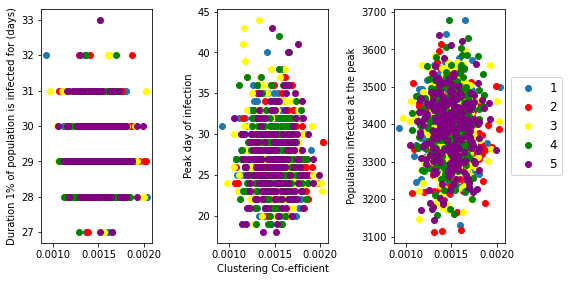

In [77]:
#Power scatter graph

fig1, (ax1,ax3,ax4) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(8,4))

ax1.scatter(Control[2],Control[3], label = '1')
ax3.scatter(Control[2],Control[0],label = '1')
ax4.scatter(Control[2],Control[1],label = '1')

ax1.scatter(Power_2[2],Power_2[3], color = 'red', label='2')
ax3.scatter(Power_2[2],Power_2[0], color = 'red',label='2')
ax4.scatter(Power_2[2],Power_2[1], color = 'red', label='2')

ax1.scatter(Power_3[2],Power_3[3], color = 'yellow', label='3')
ax3.scatter(Power_3[2],Power_3[0], color = 'yellow',label='3')
ax4.scatter(Power_3[2],Power_3[1], color = 'yellow',label='3')

ax1.scatter(Power_4[2],Power_4[3], color = 'green',label='4')
ax3.scatter(Power_4[2],Power_4[0], color = 'green',label='4')
ax4.scatter(Power_4[2],Power_4[1], color = 'green',label='4')

ax1.scatter(Power_5[2],Power_5[3], color = 'purple', label='5')
ax3.scatter(Power_5[2],Power_5[0], color = 'purple',label='5')
ax4.scatter(Power_5[2],Power_5[1], color = 'purple',label='5')

ax3.set_xlabel('Clustering Co-efficient')
ax1.set_ylabel('Duration 1% of population is infected for (days)')
ax3.set_ylabel('Peak day of infection')
ax4.set_ylabel('Population infected at the peak')

ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

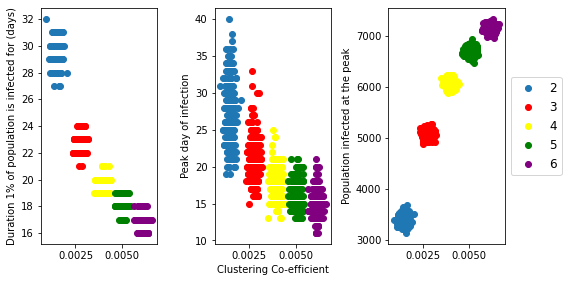

In [79]:
#Node degree scatter graph

fig1, (ax1,ax3,ax4) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(8,4))

ax1.scatter(Control[2],Control[3], label=2)
ax3.scatter(Control[2],Control[0], label=2)
ax4.scatter(Control[2],Control[1],label=2)

ax1.scatter(Degree_3[2],Degree_3[3], color = 'red', label=3)
ax3.scatter(Degree_3[2],Degree_3[0], color = 'red',label=3)
ax4.scatter(Degree_3[2],Degree_3[1], color = 'red',label=3)

ax1.scatter(Degree_4[2],Degree_4[3], color = 'yellow',label=4)
ax3.scatter(Degree_4[2],Degree_4[0], color = 'yellow',label=4)
ax4.scatter(Degree_4[2],Degree_4[1], color = 'yellow',label=4)

ax1.scatter(Degree_5[2],Degree_5[3], color = 'green',label=5)
ax3.scatter(Degree_5[2],Degree_5[0], color = 'green',label=5)
ax4.scatter(Degree_5[2],Degree_5[1], color = 'green',label=5)

ax1.scatter(Degree_6[2],Degree_6[3], color = 'purple', label=6)
ax3.scatter(Degree_6[2],Degree_6[0], color = 'purple',label=6)
ax4.scatter(Degree_6[2],Degree_6[1], color = 'purple',label=6)

ax3.set_xlabel('Clustering Co-efficient')
ax1.set_ylabel('Duration 1% of population is infected for (days)')
ax3.set_ylabel('Peak day of infection')
ax4.set_ylabel('Population infected at the peak')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

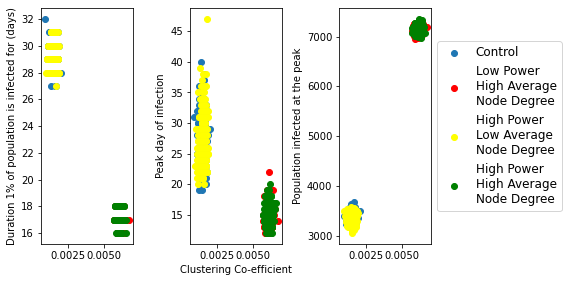

In [84]:
#Combination scatter graph

fig1, (ax1,ax3,ax4) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(8,4))

ax1.scatter(Control[2],Control[3], label= 'Control')
ax3.scatter(Control[2],Control[0], label= 'Control')
ax4.scatter(Control[2],Control[1], label= 'Control')

ax1.scatter(Lowpower_Highdegree[2],Lowpower_Highdegree[3], color = 'red', label='Low Power\nHigh Average\nNode Degree')
ax3.scatter(Lowpower_Highdegree[2],Lowpower_Highdegree[0], color = 'red',label='Low Power\nHigh Average\nNode Degree')
ax4.scatter(Lowpower_Highdegree[2],Lowpower_Highdegree[1], color = 'red',label='Low Power\nHigh Average\nNode Degree')

ax1.scatter(Highpower_Lowdegree[2],Highpower_Lowdegree[3], color = 'yellow',label='High Power\nLow Average\nNode Degree')
ax3.scatter(Highpower_Lowdegree[2],Highpower_Lowdegree[0], color = 'yellow',label='High Power\nLow Average\nNode Degree')
ax4.scatter(Highpower_Lowdegree[2],Highpower_Lowdegree[1], color = 'yellow',label='High Power\nLow Average\nNode Degree')

ax1.scatter(High_both[2],High_both[3], color = 'green',label='High Power\nHigh Average\nNode Degree')
ax3.scatter(High_both[2],High_both[0], color = 'green',label='High Power\nHigh Average\nNode Degree')
ax4.scatter(High_both[2],High_both[1], color = 'green',label='High Power\nHigh Average\nNode Degree')


ax3.set_xlabel('Clustering Co-efficient')
ax1.set_ylabel('Duration 1% of population is infected for (days)')
ax3.set_ylabel('Peak day of infection')
ax4.set_ylabel('Population infected at the peak')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

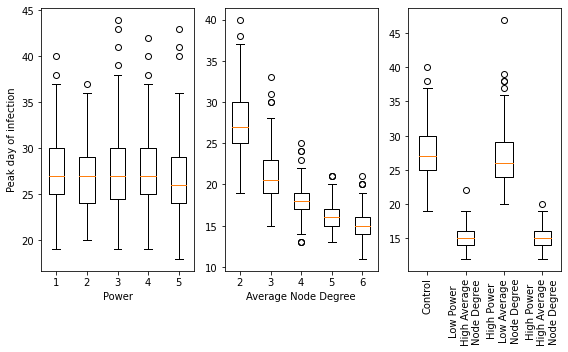

In [44]:
# Box plot

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(8,5))
ax1.boxplot ([Control[0], Power_2[0], Power_3[0], Power_4[0], Power_5[0]])
ax2.boxplot ([Control[0], Degree_3[0], Degree_4[0], Degree_5[0], Degree_6[0]])
ax3.boxplot ([Control[0], Lowpower_Highdegree[0], Highpower_Lowdegree[0], High_both[0]])

ax1.set_xlabel('Power')
ax1.set_xticklabels(['1', '2', '3', '4', '5'])
ax2.set_xlabel('Average Node Degree')
ax2.set_xticklabels(['2', '3', '4', '5', '6'])
ax3.set_xticklabels(['Control', 'Low Power\nHigh Average\nNode Degree', 'High Power\nLow Average\nNode Degree', 'High Power\nHigh Average\nNode Degree'])
ax3.tick_params(axis='x', labelrotation = 90)
#ax1.set_ylabel('Peak day of infection')
ax1.set_ylabel('Peak day of infection')
#ax3.set_ylabel('Peak day of infection')

plt.tight_layout()
plt.show()
